# Мультипоточность & Многопроцессность

## `Общая схема`

**Любая программа, когда она выполняется, всегда запускается в контексте процесса.**

**Программа** — это набор инструкций, написанных на каком-либо языке программирования. Пока программа хранится на диске в виде файлов с кодом, она является лишь статическим набором данных и инструкций.

**Процесс** — это экземпляр выполнения программы. Когда программа запускается, операционная система создаёт процесс, который включает в себя всё необходимое для выполнения этой программы


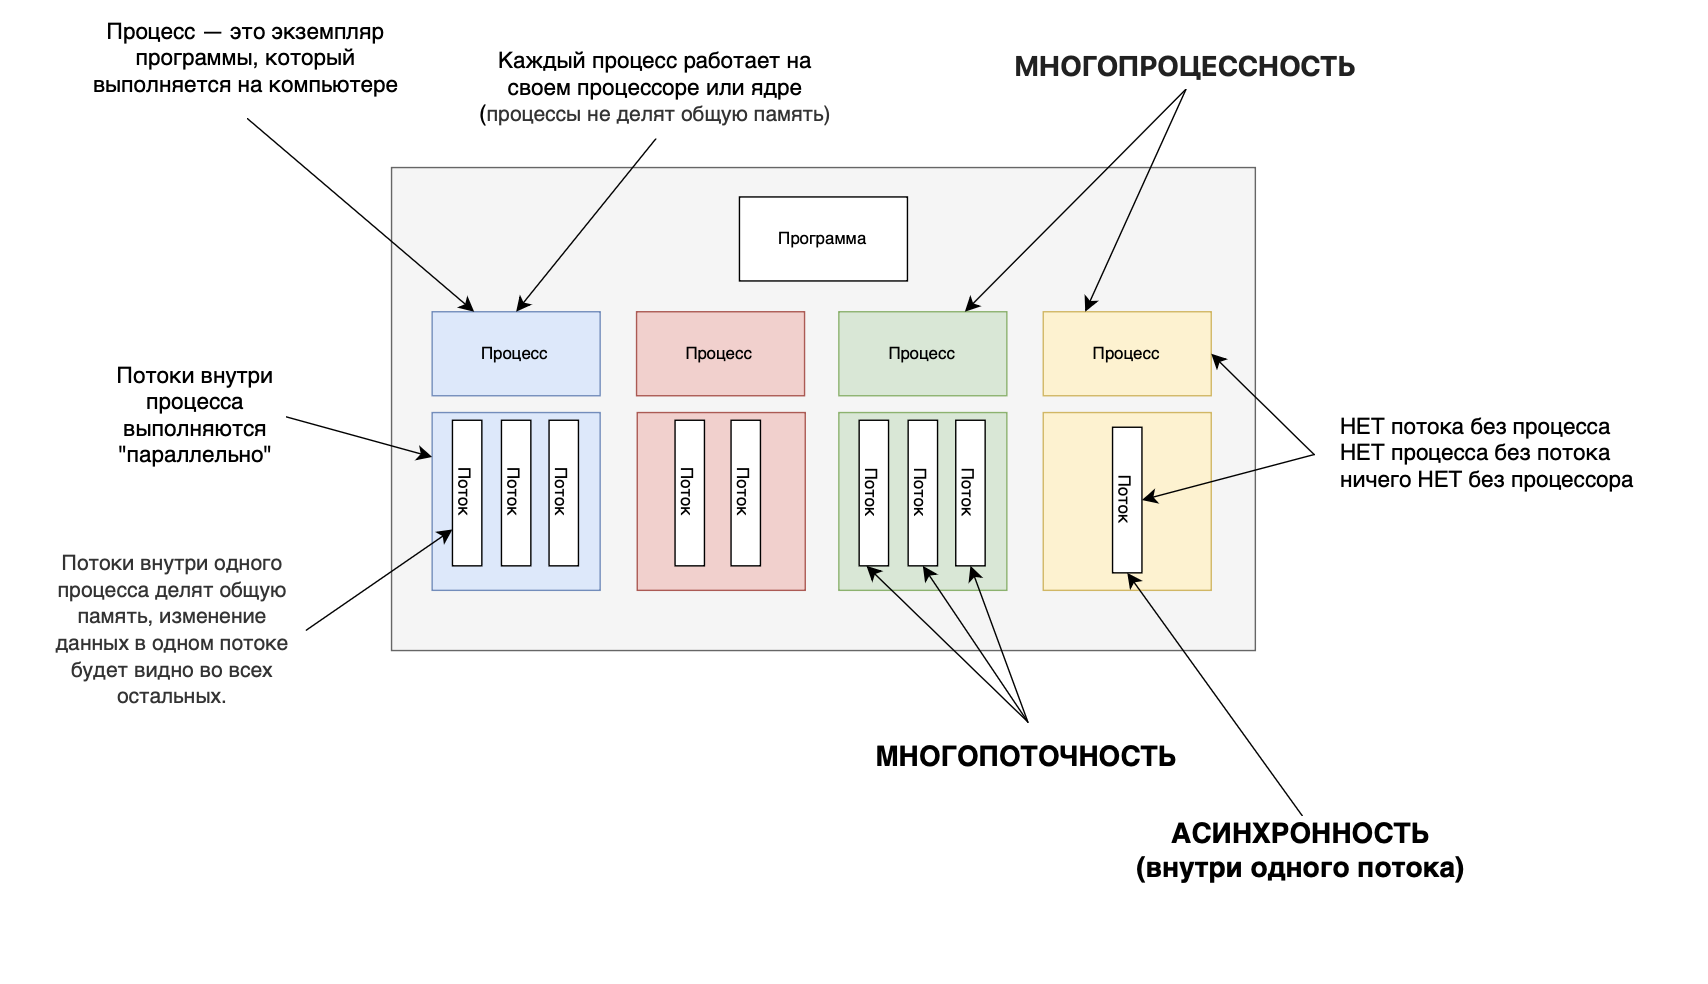

## `Конкурентность & Параллелизм`

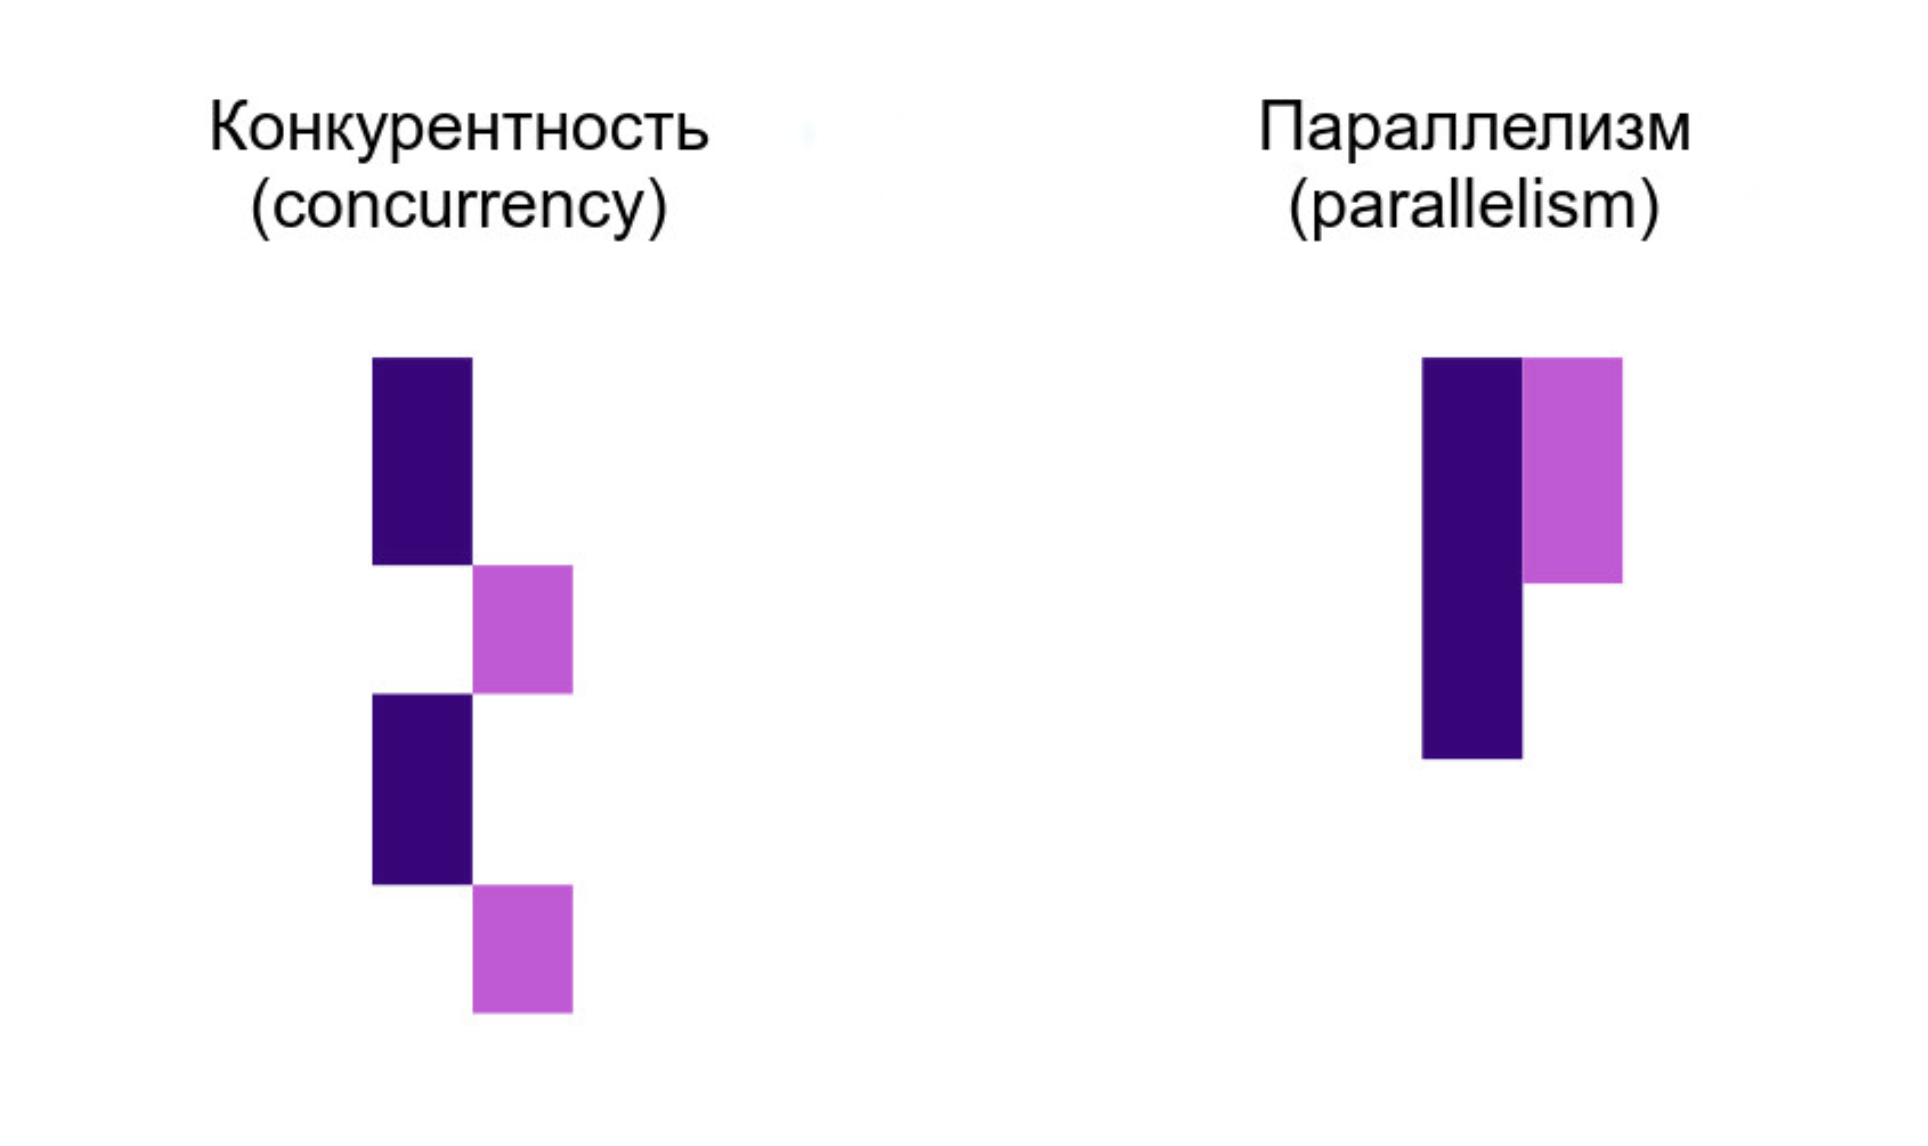

### Конкурентность (Concurrency)

**Конкурентность** — это свойство системы выполнять несколько задач одновременно, даже если фактически эти задачи не выполняются параллельно. В контексте программирования это означает, что система может переключаться между задачами таким образом, чтобы создавать впечатление одновременного выполнения, даже если на самом деле задачи выполняются поочередно.

### Параллелизм (Parallelism)

Параллелизм — это выполнение нескольких задач одновременно на разных процессорных ядрах или на разных машинах. Это возможно только в системах с несколькими процессорными ядрами (или на кластере машин). В параллелизме задачи действительно выполняются одновременно, что позволяет значительно ускорить выполнение программы.

## `Глобальная блокировка интерпретатора (Global Interpreter Lock)`

Упрощает разработку и управление памятью, но накладывает ограничения на параллелизм в многопоточных приложениях

**Визуализация работы GIL:** https://upload.wikimedia.org/wikipedia/commons/0/09/GIL_description.gif


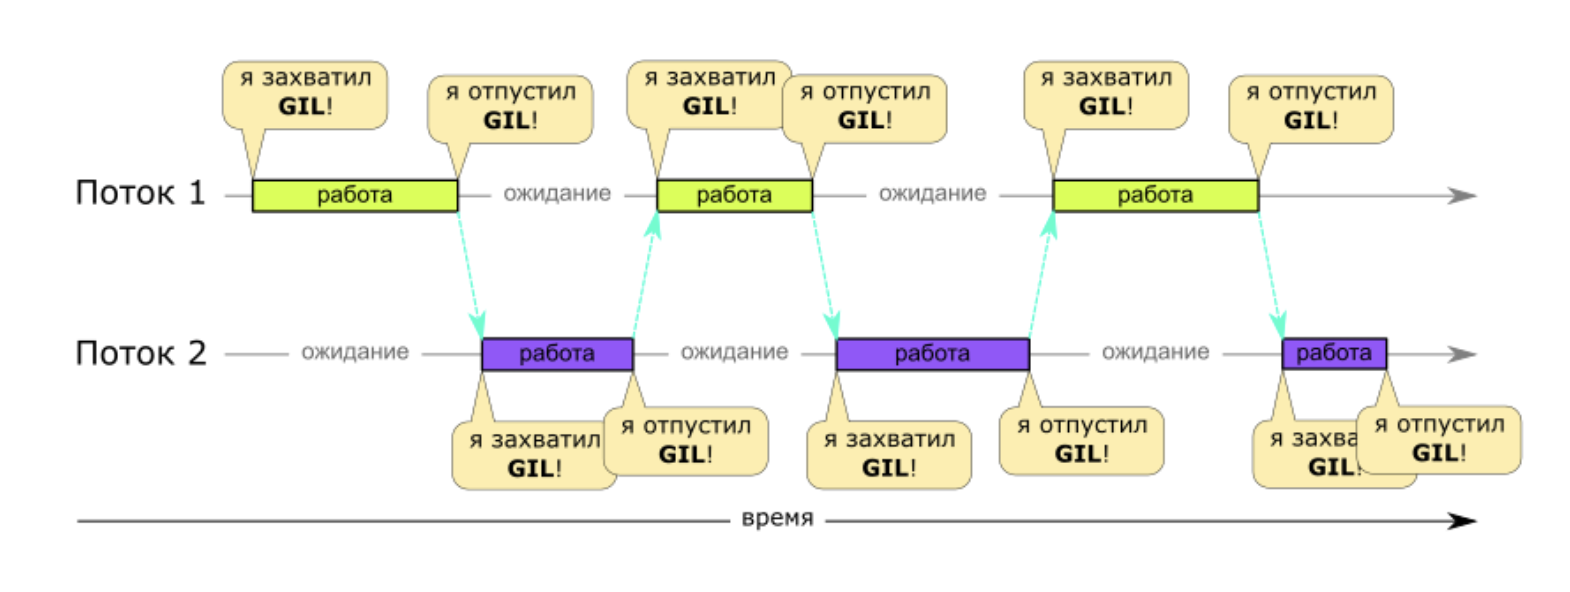

**GIL** (Global Interpreter Lock) — это механизм, используемый в некоторых реализациях интерпретаторов языков программирования (наиболее известен в Python), который ограничивает выполнение одновременно только одного потока на уровне интерпретатора, даже на многопроцессорных системах.

### История и контекст

GIL был введен в интерпретаторе CPython, основной реализации языка Python, чтобы упростить управление памятью и сделать реализацию интерпретатора проще и безопаснее. В Python управление памятью, включая сборку мусора, осуществляется с помощью счётчика ссылок (reference counting). GIL обеспечивает безопасность операций с этим счётчиком, не позволяя нескольким потокам одновременно изменять его значение.

### Как работает GIL?

- **Блокировка**: GIL представляет собой глобальную блокировку, которая разрешает выполнение только одному потоку Python-кода в любой момент времени. Когда поток получает GIL, он может выполнять Python-инструкции. Остальные потоки должны ждать освобождения GIL.

- **Освобождение и захват**: В течение времени выполнения, текущий поток может освободить GIL, чтобы другой поток мог получить его и начать выполнение. Это происходит, например, когда выполняются операции ввода-вывода (например, чтение файла или ожидание сетевого ответа), которые не требуют активного использования процессора.

- **Переключение между потоками**: GIL периодически освобождается текущим потоком, чтобы дать другим потокам возможность выполнения. Этот процесс называется переключением контекста (context switch). В CPython переключение обычно происходит через каждые 100 интерпретируемых байт-кодов.

### Преимущества GIL

1. **Простота реализации**: GIL упрощает реализацию интерпретатора, так как устраняет необходимость в сложных механизмах синхронизации при доступе к объектам Python, таким как управление памятью и сборка мусора.

2. **Безопасность работы**: GIL предотвращает многие ошибки, связанные с конкурентным доступом к данным, которые могут возникнуть в многопоточных программах.

3. **Удобство для I/O-ориентированных приложений**: В программах, которые большую часть времени проводят в ожидании операций ввода-вывода, влияние GIL не так заметно, так как другие потоки могут выполняться, пока один поток ожидает завершения операции.

### Недостатки GIL

1. **Ограничение параллелизма**: На многопроцессорных системах GIL не позволяет эффективно использовать все ядра процессора. Даже если программа запускает несколько потоков, только один поток может активно выполнять Python-код в каждый момент времени.

2. **Снижение производительности**: В CPU-интенсивных задачах, которые требуют большого объема вычислений, GIL может стать узким местом, ограничивая производительность программы. Например, программы, выполняющие сложные математические вычисления или обработку данных, могут не получить прирост производительности от многопоточности из-за GIL.

3. **Усложнение масштабирования**: Для масштабирования программ приходится использовать процессы вместо потоков, что приводит к дополнительным затратам на межпроцессное взаимодействие и управлению памятью.

### Обход GIL

Несмотря на ограничения GIL, есть несколько способов, которые позволяют частично обойти его и всё же добиться параллельного выполнения задач:

1. **Использование процессов вместо потоков**: В Python модуль `multiprocessing` позволяет создавать несколько процессов, каждый из которых имеет свой собственный интерпретатор и, соответственно, свой GIL. Это позволяет использовать все ядра процессора для выполнения задач параллельно.

2. **C-расширения**: Если необходимо выполнить тяжёлые вычисления, можно использовать C-расширения, которые могут временно освободить GIL и выполнять параллельные вычисления вне Python-интерпретатора. Модуль `numpy`, например, использует этот подход.

3. **Асинхронное программирование**: В задачах, связанных с большим количеством операций ввода-вывода, можно использовать асинхронное программирование (`asyncio`), которое эффективно использует однопоточное выполнение без необходимости параллельного выполнения потоков.

4. **Другие реализации Python**: Существуют альтернативные реализации Python, которые не используют GIL. Например:
   - **Jython**: Реализация Python на Java, использующая JVM, которая не имеет GIL.
   - **IronPython**: Реализация Python на .NET, также без GIL.
   - **PyPy**: Альтернативная реализация Python, которая включает экспериментальные возможности отключения GIL.

### Заключение

GIL является важным и в то же время спорным аспектом интерпретатора CPython. Он упрощает разработку и управление памятью, но накладывает ограничения на параллелизм в многопоточных приложениях. В зависимости от характера задачи и архитектуры приложения, можно выбирать подходящие методы для обхода GIL и достижения желаемой производительности.

## `IO bound (Input / Output) и CPU bound`

### IO bound

В выражении IO bound: I/O значит Input/Output (Ввод/Вывод), а bound переводится как связанный. То есть IO bound задачи - это задачи, совокупное время выполнения которых в основном определяется временем выполнения всех операций ввода/вывода. Например, когда программа читает или записывает файлы, отправляет или получает данные через интернет, общается с пользователем и так далее. Если вы замечаете, что ваша программа больше времени ожидает ответ, чем работает, значит, она ограничена именно операциями ввода-вывода.

### Аналогия из жизни:
Представьте, что вы в библиотеке и вам нужно прочитать определенную книгу. Как можно охарактеризовать операции, которые вам придется для этого сделать?

- Поиск книги библиотекарем — это как задача, которая зависит от ввода-вывода (IO bound). Здесь дело в том, что Вам нужно подождать, пока библиотекарь найдёт книгу. Это время ожидания, потому что Вы зависите от действий другого человека. Например, библиотекарь идёт к каталогу, проверяет наличие книги, идёт к полке, ищет её среди других книг и, наконец, приносит её Вам, в это время вы можете заниматься своими делами. Весь этот процесс — это внешняя операция, которая требует времени на выполнение и не зависит напрямую от Вас.
 
- Чтение книги — это задача, требующая вычислительных мощностей (CPU bound). Когда Вы начинаете читать, Ваш мозг активно работает с информацией: анализирует текст, визуализирует события, запоминает детали и так далее. Этот процесс полностью зависит от Вас и Вашей способности обрабатывать информацию. В данном случае книга уже у Вас в руках, и, как быстро Вы её прочитаете, зависит только от Вашего "внутреннего процессора", то есть мозга.

**Примеры IO операций:**

- Чтение или запись файла на жесткий диск
- Взаимодействие со стандартными потоками ввода, вывода или ошибок (stdin, stdout, stderr)
- Печать документов
- Загрузка или выгрузка файлов
- Обращение к серверу
- Запросы к базе данных
- Фотографирование или запись видео

**Чтение и запись файлов:** Это самые общие примеры IO операций. Когда вы открываете файл для чтения или записи, вы выполняете IO операцию.
```python
# Чтение файла
with open('file.txt', 'r') as f:
    data = f.read()

# Запись в файл
with open('file.txt', 'w') as f:
    f.write('Hello, World!')
```

**Сетевые операции, взаимодействие с API:** Это включает в себя отправку и получение данных по сети. Это может быть общение с веб-сервером, обмен данными между клиентом и сервером или даже чтение и запись данных в базу данных.
```python
import requests

# Отправка GET запроса
```python
response = requests.get('http://www.python.org')

# Отправка POST запроса
response = requests.post('http://www.python.org', data={'key':'value'})
```

**Взаимодействие с пользователем:** Это может включать в себя чтение ввода с клавиатуры или вывод информации на экран.
```python
# Чтение ввода с клавиатуры
```python
name = input('Введите ваше имя: ')

# Вывод информации на экран
print(f'Привет, {name}!')
```

**Взаимодействие с базами данных:** Это может включать в себя чтение и запись данных в базу данных, выполнение SQL-запросов, транзакций и так далее.
```python
import sqlite3

# Подключение к базе данных
conn = sqlite3.connect('example.db')

# Создание курсора
c = conn.cursor()

# Выполнение SQL-запроса
c.execute("SELECT * FROM stocks WHERE symbol = 'RHAT'")
```


### CPU bound

Когда говорят, что задача или программа "CPU bound", это значит, что скорость выполнения зависит преимущественно от мощности процессора. Если Ваша программа большую часть времени тратит на вычисления или обработку данных, то она именно такая.

### Аналогия из жизни:
Представьте, что Вы сталкиваетесь с трудной математической задачей. Время, которое Вы потратите на её решение, будет похоже на ситуацию с CPU bound. Почему? Потому что Вы будете интенсивно задействовать свои мозговые ресурсы — умственные способности, чтобы найти решение. Этот процесс требует активного мышления, ведь именно от Вашей способности быстро и эффективно обрабатывать информацию зависит, как быстро Вы справитесь с задачей.

Примеры CPU операций:

**Арифметические и логические операции:** Это включает в себя операции сложения, вычитания, умножения, деления, возведения в степень, а также операции сравнения и логические операции (и, или, не).
```python
# Арифметические операции
result = (3 + 4) * 5 / 2

# Логические операции
is_true = (5 > 3) and (2 < 4)
 ```

**Циклы:** Циклы, такие как for и while, требуют активного использования процессора для итерации по элементам или выполнения повторяющихся действий.
```python
# Цикл for
for i in range(10):
    print(i)

# Цикл while
i = 0
while i < 10:
    print(i)
    i += 1
 ```

**Условные операторы:** Условные операторы, такие как if, elif и else, задействуют процессор для проверки условий и выполнения соответствующих действий.
```python
# Условные операторы
x = 10
if x > 5:
    print('x больше 5')
elif x < 5:
    print('x меньше 5')
else:
    print('x равно 5')
 ```

**Функции:** Вызов функций и методов, а также возвращение значений, требует активного использования процессора.
```python
# Определение функции
def square(x):
    return x ** 2

# Вызов функции
result = square(5)
 ```

**Обработка данных:** Это может включать в себя сортировку данных, поиск данных, преобразование данных и так далее.
```python
# Сортировка списка
numbers = [5, 2, 3, 1, 4]
numbers.sort()

# Поиск в списке
index = numbers.index(3)
 ```

**Обработка изображений и видео:** Включает в себя фильтрацию изображений, изменение размера, преобразование форматов, кодирование и декодирование видео и так далее. Эти операции обычно требуют значительных вычислительных ресурсов процессора.
```python
from PIL import Image, ImageFilter

# Открытие изображения
img = Image.open('image.jpg')

# Применение фильтра
img = img.filter(ImageFilter.BLUR)

# Сохранение изображения
img.save('blurred_image.jpg')
 ```

**Машинное обучение:** Тренировка моделей машинного обучения часто требует значительных вычислительных ресурсов, особенно при работе с большими наборами данных и сложными моделями.
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
X, y = iris.data, iris.target

# Обучение модели
clf = RandomForestClassifier()
clf.fit(X, y)
 ```

**Научные вычисления:** Это может включать в себя сложные математические вычисления, такие как интегрирование, дифференцирование, решение дифференциальных уравнений и так далее.
```python
import numpy as np

# Создание массива
x = np.array([1, 2, 3, 4, 5])

# Вычисление синуса для каждого элемента массива
y = np.sin(x)
 ```

**Криптография:** Операции шифрования и дешифрования, а также генерация и проверка цифровых подписей обычно требуют значительных вычислительных ресурсов.
```python
from cryptography.fernet import Fernet

# Генерация ключа
key = Fernet.generate_key()

# Создание объекта шифрования
cipher = Fernet(key)

# Шифрование сообщения
message = b"Hello, World!"
encrypted_message = cipher.encrypt(message)
```

## `Визуализация работы GIL в контексте IO bound и CPU bound операций`

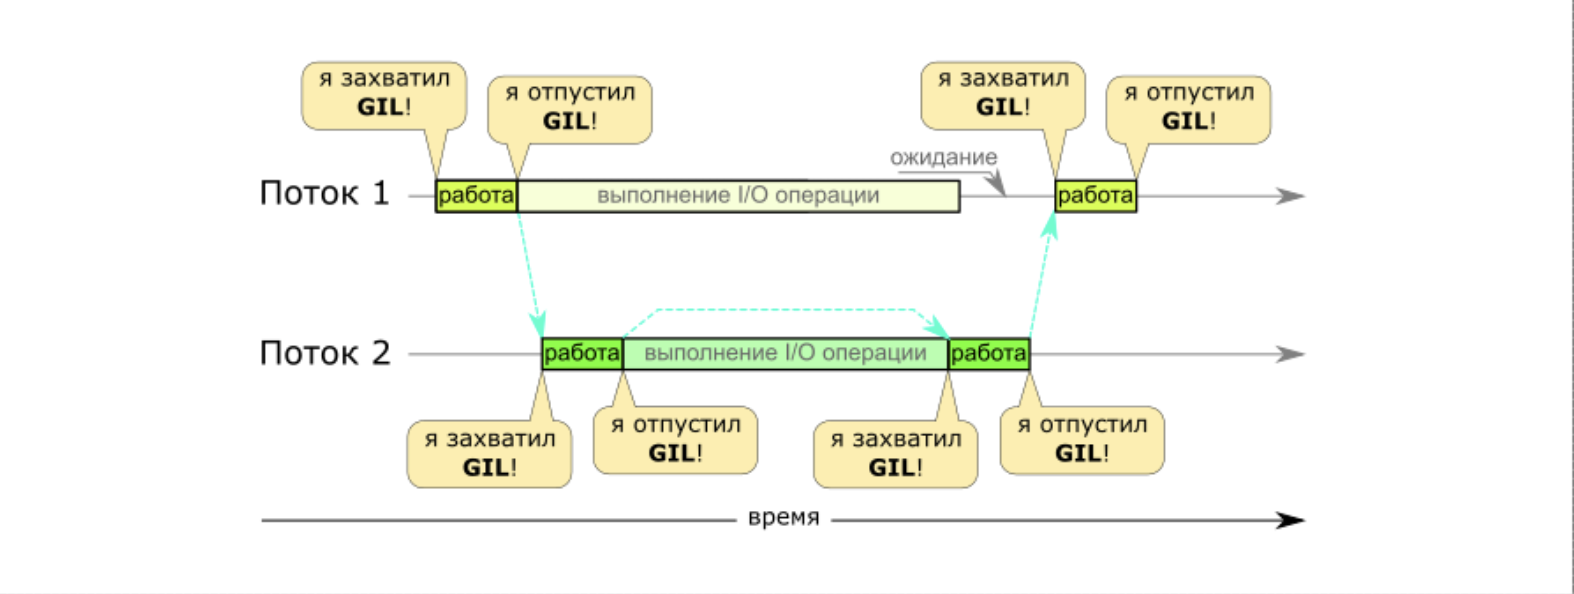

# `Мультипоточность = Многопоточность(библиотека threading)`

**Многопоточность** — это возможность выполнения нескольких потоков (независимых последовательностей инструкций) одновременно внутри одного процесса. Она используется для улучшения производительности программ, особенно на многоядерных процессорах, где потоки могут выполняться параллельно.

### Основные понятия и термины

1. **Поток**: Это наименьшая единица выполнения кода, которая может быть запущена и управляться операционной системой. В одном процессе может быть несколько потоков, которые могут выполняться параллельно.

2. **Процесс**: Это программа в состоянии выполнения. Каждый процесс содержит свои собственные ресурсы, такие как память, файлы, и может содержать один или несколько потоков.

3. **Параллелизм и конкурентность**:
   - **Параллелизм** — это одновременное выполнение нескольких потоков на разных ядрах процессора.
   - **Конкурентность** — это способность системы управлять несколькими потоками, которые могут не выполняться одновременно, но чередуют своё выполнение.

### Зачем нужна многопоточность?

Многопоточность позволяет:
- **Улучшить производительность**: За счёт распределения задач между несколькими потоками можно быстрее выполнить сложные вычисления, особенно на многоядерных процессорах.
- **Улучшить отзывчивость программ**: Например, графический интерфейс программы может оставаться отзывчивым, пока в фоновом потоке выполняется сложная задача.
- **Эффективно использовать ресурсы**: Например, в программах, работающих с сетью, многопоточность позволяет продолжать обработку данных, пока выполняются сетевые запросы.

### Преимущества и недостатки многопоточности

#### Преимущества:
1. **Параллельное выполнение задач**: Ускорение выполнения программ за счет разделения задач между потоками.
2. **Улучшение отзывчивости приложений**: Приложение может продолжать работать, пока выполняются длительные операции в других потоках.
3. **Эффективное использование многоядерных процессоров**: Многопоточность позволяет распределять задачи между разными ядрами процессора.

#### Недостатки:
1. **Сложность разработки**: Код, работающий в многопоточном режиме, сложнее писать и отлаживать.
2. **Проблемы синхронизации**: Потоки могут одновременно пытаться изменить одни и те же данные, что может привести к ошибкам. Для предотвращения этого необходимо использовать механизмы синхронизации (например, мьютексы, семафоры).
3. **Переключение контекста**: Операционная система тратит ресурсы на переключение между потоками, что может снижать производительность.


### Главный поток - MainThread
- Главный поток — это тот поток, в котором по умолчанию выполняется ваш код в любом Python-процессе.
- Когда главный поток завершает свое выполнение, весь процесс Python завершается, если нет других активных недемонических потоков.

In [3]:
import threading

def check_main_thread():
    if threading.current_thread().name == "MainThread":
        print("Это главный поток")
    else:
        print("Это не главный поток")

check_main_thread()

Это главный поток


### Главный и текущий поток 

In [44]:
from threading import main_thread, current_thread

def check_main_thread():
    c_thread = current_thread()
    m_thread = main_thread()

    print(f"Главный потока: {m_thread.name} (daemon={m_thread.daemon}, id={m_thread.ident})")
    print(f"Текущий потока: {c_thread.name} (daemon={c_thread.daemon}, id={c_thread.ident})")
    
    if current_thread().name == main_thread().name:
        print("Это главный поток")
    else:
        print("Это не главный поток")

check_main_thread()

Главный потока: MainThread (daemon=False, id=8263006912)
Текущий потока: MainThread (daemon=False, id=8263006912)
Это главный поток


### Как создать свой поток?

In [ ]:
from threading import Thread

# Функция, которую мы хотим выполнить в отдельном потоке
def task():
    for i in range(1, 6):
        print(i)

# создаем и настраиваем новый поток для выполнения функции
thread = Thread(target=task)

# запускаем задачу в новом потоке
thread.start()

# По факту завершения работы функции этот поток завершит свою работу.
# Перезапуск невозможен 

## Можно запустить несколько потоков 
Все потоки выведут свои уникальные имена, состояние флага daemon и идентификаторы.

In [52]:
import threading
from time import sleep


def thread_function():
    # sleep(2) # <--- см на id потоков 
    c_thread = threading.current_thread()
    print(f'Дочерний поток: имя={c_thread.name}, daemon={c_thread.daemon}, id={c_thread.ident}')


for i in range(5):
    thread = threading.Thread(target=thread_function, name=f"Worker-{i + 1}")
    thread.start()

Дочерний поток: имя=Worker-1, daemon=False, id=6237073408
Дочерний поток: имя=Worker-2, daemon=False, id=6253899776
Дочерний поток: имя=Worker-3, daemon=False, id=6237073408
Дочерний поток: имя=Worker-4, daemon=False, id=6237073408
Дочерний поток: имя=Worker-5, daemon=False, id=6237073408


### Демонический (фоновый) поток
Основные особенности демонического потока:

- Завершение при закрытии основной программы: Демонический поток автоматически закрывается, когда завершаются все недемонические (обычные) потоки программы. Это значит, что если в вашей программе остаются только демонические потоки, программа завершится.

- Фоновая обработка: Демонические потоки часто используются для выполнения фоновых задач, таких как мониторинг состояния системы, выполнение регулярных операций в фоне, и так далее. Они не предназначены для выполнения основных функций программы.

- Не блокирует завершение программы: Поскольку демонические потоки не являются критически важными для выполнения программы, их наличие не мешает Python закрыть программу, даже если они ещё активны.

In [53]:
import threading
import time


def background_task():
    time.sleep(3)
    print(f"Фоновая задача завершилась через 3 секунды работы")


thread = threading.Thread(target=background_task, daemon=True)
thread.start()

In [ ]:
import threading
import time


def background_task():
    while True:
        print(f"Фоновая задача завершилась через 3 секунды работы")


thread = threading.Thread(target=background_task, daemon=True)
thread.start()

time.sleep(1)

### join - Какой вывод даст следующий код?

In [22]:
import threading
import time

def print_thread_name():
    time.sleep(2)
    print(threading.current_thread().name)
    

thread = threading.Thread(target=print_thread_name, name="CustomThread")
thread.start()
thread.join() # никуда дальше этой строчки кода не пойдем, пока поток не закончит работу 

print_thread_name()

CustomThread
MainThread


### Еще один пример 

In [60]:
import threading
import time

def countdown():
    for i in range(5, 0, -1):
        print(f"Осталось {i} секунд")
        time.sleep(1)


thread = threading.Thread(target=countdown)
print("Запущен обратный отсчет.")

thread.start()
thread.join() # а если без него?

print("Обратный отсчет завершен. Главный поток продолжает выполнение.")

Запущен обратный отсчет.
Осталось 5 секунд
Обратный отсчет завершен. Главный поток продолжает выполнение.


### join - ждем, когда поток выполнится до конца

In [58]:
from time import sleep, time
from threading import Thread, current_thread


def task():
    task_thread_id = current_thread().ident
    sleep(5)
    print(f'Это сообщение от задачи task из потока {task_thread_id}')


# Засекаем время начала выполнения скрипта
start = time()

# Определяем id главного потока и выводим его
base_thread_id = current_thread().ident
print(f'id главного потока: {base_thread_id}')

# Создаем и запускаем новый поток для выполнения функции task
thread = Thread(target=task)
print("Запускаем новый поток")
thread.start()

# выводим сообщение
print('Ждем завершения нового потока...')

# Главный поток засыпает
sleep(6) # <---------------------- 3 vs 6 
print('Главный поток проснулся')
print(f"Время выполнения программы: {time() - start:.4f} секунды")

# Ждем завершения задачи и завершения работы нового потока
thread.join()
print('Работа нового потока завершена')
print(f"Время выполнения программы: {time() - start:.4f} секунды")

id главного потока: 8263006912
Запускаем новый поток
Ждем завершения нового потока...
Это сообщение от задачи task из потока 6237073408
Главный поток проснулся
Время выполнения программы: 6.0014 секунды
Работа нового потока завершена
Время выполнения программы: 6.0015 секунды


### Тренируемся: Чему будет равно global_variable? 

In [63]:
from time import sleep
from threading import Thread

global_variable = 909

def task():
    # Засыпаем...
    sleep(.1) # <-------- а если закомментируем? 
    # Выводим сообщение
    print(f'Значение {global_variable = }')

# Создаем и настраиваем новый поток для выполнения функции task
thread = Thread(target=task)
thread.start()
global_variable += 42
thread.join() 


Значение global_variable = 951


### Как передавать args 

In [36]:
import threading

def thread_function(name, number):
    print(f"Привет, {name}! Твой номер: {number}")

# Создание и запуск потока с передачей аргументов
thread = threading.Thread(target=thread_function, args=("Алиса", 42)) # (1, )
thread.start()

# Ожидание завершения потока
thread.join()

Привет, Алиса! Твой номер: 42


### Если несколько потоков нужно запустить и дождаться 

In [66]:
import threading
from functools import reduce
from operator import mul
from time import sleep


def calculate_sum(array):
    sleep(2)
    result['sum'] = sum(array)


def calculate_product(array):
    sleep(2)
    result['product'] = reduce(mul, array, 1)


result = {} # <----- обращаемся к глобальной переменной 

sum_thread = threading.Thread(target=calculate_sum, args=(range(1, 1001),))
product_thread = threading.Thread(target=calculate_product, args=(range(1, 11),))

[thread.start() for thread in (sum_thread, product_thread)]
[thread.join() for thread in (sum_thread, product_thread)] # а если закомментируем

print(f"Сумма чисел от 1 до 1000: {result['sum']}")
print(f"Произведение чисел от 1 до 10: {result['product']}")

Сумма чисел от 1 до 1000: 500500
Произведение чисел от 1 до 10: 3628800


### Потоки на классах 

Метод `run()` в классе `threading.Thread` является основным методом, который выполняется при запуске потока. Когда вы создаете новый поток, обычно вы передаете функцию в качестве `target`, и поток вызывает эту функцию внутри себя. Однако в некоторых случаях бывает полезно создать подкласс от `threading.Thread` и переопределить метод `run()` для выполнения пользовательской логики.

#### Зачем нужно переопределять `run()`?

1. **Инкапсуляция логики потока**: Переопределение `run()` позволяет инкапсулировать всю логику работы потока в одном классе, что упрощает понимание и поддержку кода.

2. **Использование объектов с состоянием**: Если потоку необходимо поддерживать собственное состояние или иметь несколько методов, переопределение `run()` позволяет удобно организовать такой функционал в объектно-ориентированном стиле.

3. **Повторное использование кода**: Создание подкласса `Thread` и переопределение `run()` позволяет легко создавать и запускать потоки с одинаковой логикой, не повторяя код.


In [ ]:
import threading

class MyThread(threading.Thread):
    def __init__(self, number):
        super().__init__()
        self.number = number
        self.result = None # <---- хранит информацию даже после завершения работы 

    def run(self):
        # Логика, которая будет выполняться в потоке
        self.result = self.number * 2
        print(f"Результат в потоке {self.name}: {self.result}")

# Создание и запуск потоков
threads = []
for i in range(5):
    thread = MyThread(i)
    threads.append(thread)
    thread.start()

# Ожидание завершения всех потоков
for thread in threads:
    thread.join()

# Сбор и вывод результатов
results = [thread.result for thread in threads]
print("Все результаты:", results)


### Lock

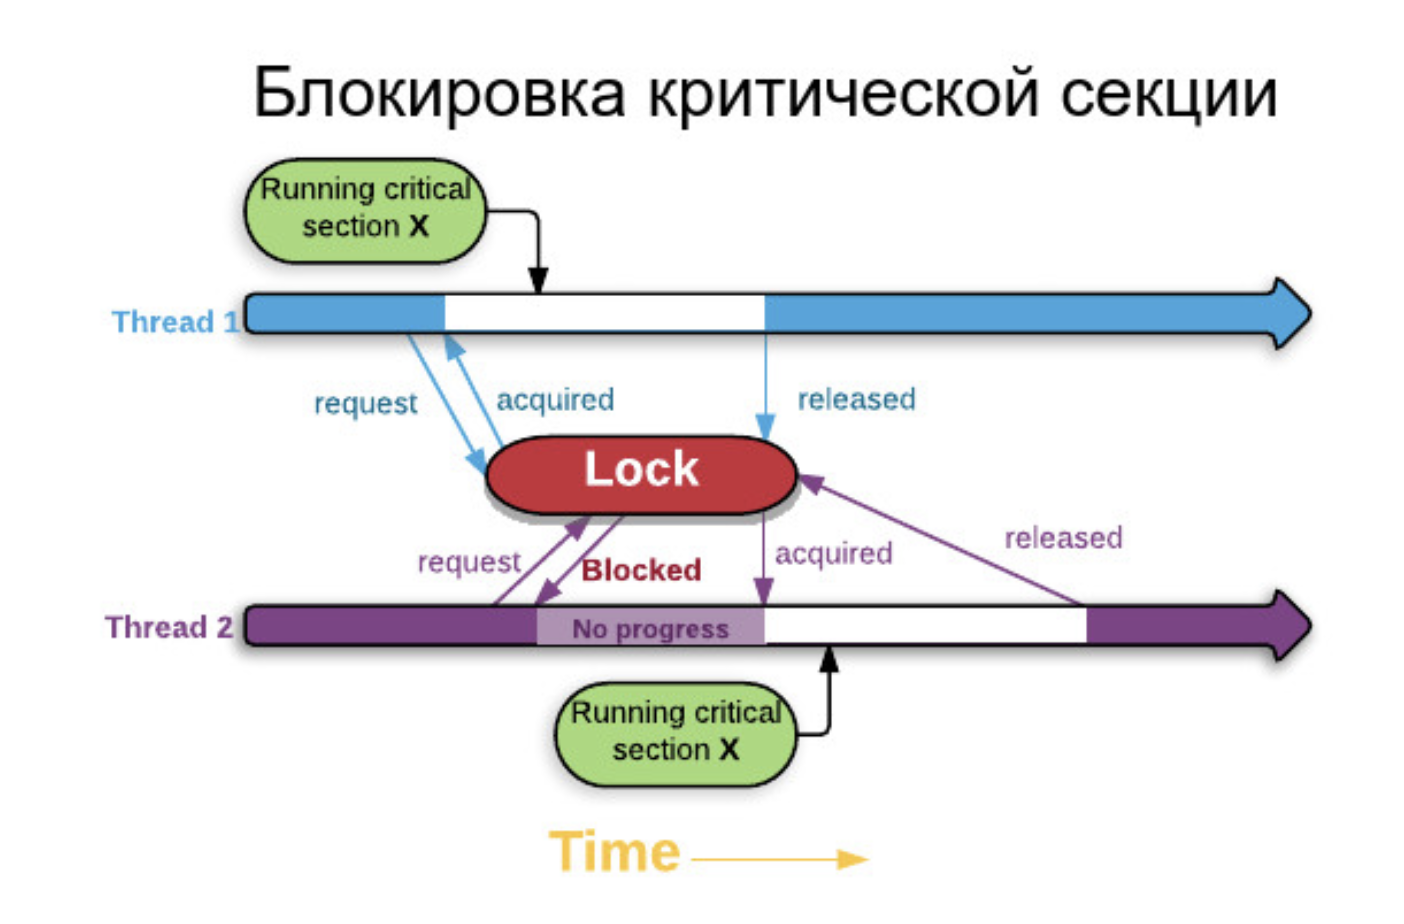

**Когда множество потоков пытаются записать данные в один и тот же файл без какой-либо синхронизации, возникают следующие проблемы:**

- Гонка за ресурсы (Race Condition): Потоки могут одновременно пытаться записать в файл, что приводит к наложению данных или потере некоторых записей.

- Непредсказуемый порядок записи: Поскольку потоки работают асинхронно, порядок, в котором числа записываются в файл, может быть случайным.

- Потеря данных: Некоторые числа могут вообще не записаться, если два или более потока пытаются выполнить операцию записи одновременно.

**Преимущества использования блокировки при записи в файл**

Использование блокировки `lock = threading.Lock()` в многопоточной программе помогает обеспечить, что только один поток может выполнять определенный блок кода одновременно. В контексте записи в файл это означает:

- Последовательность и целостность данных: Блокировка гарантирует, что только один поток может записывать в файл в данный момент времени, предотвращая наложение и потерю данных.

- Полная запись всех элементов: Поскольку каждый поток ждет своей очереди для записи, все числа будут записаны в файл, и никакие данные не будут потеряны.

### Пример записи в файл БЕЗ Lock 

In [30]:
import threading

def write_to_file_without_lock(file_name, number):
    with open(file_name, 'a') as f:
        f.write(f"{number}\n")
    print(f"Записано число {number}")

# Имя файла для записи
file_name = "numbers_without_lock.txt"

# Очистка файла перед записью
with open(file_name, 'w') as f:
    pass

# Создание и запуск потоков
for i in range(50):
    threading.Thread(target=write_to_file_without_lock, args=(file_name, i)).start()  

Записано число 0
Записано число 1
Записано число 3
Записано число 5
Записано число 2
Записано число 4
Записано число 6
Записано число 7
Записано число 9
Записано число 10
Записано число 8
Записано число 11
Записано число 12
Записано число 13
Записано число 14
Записано число 16
Записано число 15
Записано число 18
Записано число 17
Записано число 19
Записано число 20
Записано число 21
Записано число 23
Записано число 22
Записано число 25
Записано число 24
Записано число 27
Записано число 26
Записано число 28
Записано число 29
Записано число 30
Записано число 31
Записано число 32
Записано число 33
Записано число 34
Записано число 35
Записано число 36
Записано число 37
Записано число 38
Записано число 39
Записано число 40
Записано число 41
Записано число 43
Записано число 42
Записано число 44
Записано число 45
Записано число 46
Записано число 47
Записано число 48
Записано число 49


### Пример с Lock

In [35]:
import threading

# Создаем объект блокировки
lock = threading.Lock()

def write_to_file_with_lock(file_name, number):
    lock.acquire() # <---------- да, замочек, но это плохое решение 
    f = open(file_name, 'a')
    f.write(f"{number}\n")
    lock.release()
    print(f"Записано число {number} с блокировкой")

# Имя файла для записи
file_name = "numbers_with_lock.txt"

# Очистка файла перед записью
f = open(file_name, 'w')
f.close()

# Создание и запуск потоков
for i in range(50):
    threading.Thread(target=write_to_file_with_lock, args=(file_name, i)).start()  # <---- args 

Записано число 0 с блокировкойЗаписано число 1 с блокировкой

Записано число 2 с блокировкой
Записано число 3 с блокировкой
Записано число 4 с блокировкой
Записано число 5 с блокировкой
Записано число 6 с блокировкой
Записано число 7 с блокировкой
Записано число 8 с блокировкой
Записано число 9 с блокировкой
Записано число 10 с блокировкой
Записано число 11 с блокировкой
Записано число 12 с блокировкой
Записано число 13 с блокировкой
Записано число 14 с блокировкой
Записано число 15 с блокировкой
Записано число 16 с блокировкой
Записано число 17 с блокировкой
Записано число 18 с блокировкой
Записано число 19 с блокировкой
Записано число 20 с блокировкой
Записано число 21 с блокировкой
Записано число 22 с блокировкой
Записано число 23 с блокировкой
Записано число 24 с блокировкой
Записано число 25 с блокировкой
Записано число 26 с блокировкой
Записано число 27 с блокировкой
Записано число 28 с блокировкой
Записано число 29 с блокировкой
Записано число 30 с блокировкой
Записано число 31 

Этот код имеет несколько недостатков, которые могут привести к проблемам в работе программы:

1. **Проблемы с освобождением блокировки при возникновении исключений:**
   Если в блоке между `lock.acquire()` и `lock.release()` произойдет исключение (например, ошибка при записи в файл), то блокировка не будет освобождена. Это приведет к тому, что другие потоки, ожидающие освобождения блокировки, не смогут продолжить работу, что может вызвать зависание программы. Поэтому важно всегда использовать `try...finally`, чтобы гарантировать освобождение блокировки:

2. **Неявное управление файлами:**
   В текущем коде файл открывается, но не всегда корректно закрывается, что может привести к утечке дескрипторов файлов, если произойдет исключение перед закрытием файла. Это также можно исправить использованием `try...finally` или лучше — использованием контекстного менеджера `with`, который гарантирует закрытие файла:

3. **Потенциальная гонка потоков:**
   Потоки создаются и запускаются в цикле, но при этом нет гарантии, что все потоки завершат работу до завершения основной программы. В зависимости от среды выполнения, основной поток программы может завершиться до того, как все дочерние потоки закончат запись в файл. Это можно предотвратить, добавив ожидание завершения всех потоков с помощью метода `join` для каждого потока:

4. **Эффективность блокировок:**
   В данном коде блокировка охватывает как операцию записи в файл, так и открытие файла. Это может быть неэффективным, так как блокировка удерживается дольше, чем необходимо. Однако в данном случае это не критично, так как файл открывается и записывается в одном и том же потоке.

In [34]:
import threading

# Создаем объект блокировки
lock = threading.Lock()

def write_to_file_with_lock(file_name, number):
    # используем контекстный менеджер with 
    with lock: 
        with open(file_name, 'a') as f: # <--- если произойдет ошибка, lock все равно освободится 
            f.write(f"{number}\n")
    print(f"Записано число {number} с блокировкой")

# Имя файла для записи
file_name = "numbers_with_lock.txt"

# Очистка файла перед записью
with open(file_name, 'w') as f:
    pass

# Создание и запуск потоков
for i in range(50):
    threading.Thread(target=write_to_file_with_lock, args=(file_name, i)).start()  # <---- args 



Записано число 0 с блокировкой
Записано число 1 с блокировкой
Записано число 2 с блокировкой
Записано число 3 с блокировкой
Записано число 4 с блокировкой
Записано число 5 с блокировкой
Записано число 6 с блокировкой
Записано число 7 с блокировкой
Записано число 8 с блокировкой
Записано число 9 с блокировкой
Записано число 10 с блокировкой
Записано число 11 с блокировкой
Записано число 12 с блокировкой
Записано число 13 с блокировкой
Записано число 14 с блокировкой
Записано число 15 с блокировкой
Записано число 16 с блокировкой


## Обработка ошибок 

### Пример 1: Использование `try-except` внутри потока

In [71]:
import threading

def thread_function(number):
    try:
        result = 10 / number  # Это может вызвать деление на ноль
        print(f"Результат: {result}")
    except ZeroDivisionError as e:
        print(f"Ошибка в потоке {threading.current_thread().name}: {e}")
    except Exception as e:
        print(f"Неизвестная ошибка в потоке {threading.current_thread().name}: {e}")

threads = []
for i in [0, 1, 2, 3, '4', 5]:
    thread = threading.Thread(target=thread_function, args=(i,)) 
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

Ошибка в потоке Thread-10311 (thread_function): division by zero
Результат: 10.0
Результат: 5.0
Результат: 3.3333333333333335
Неизвестная ошибка в потоке Thread-10315 (thread_function): unsupported operand type(s) for /: 'int' and 'str'
Результат: 2.0


### Пример 2: Использование `threading.excepthook` (Python 3.8+)

In [74]:
import threading

def handle_thread_exception(args):
    print(f"Исключение в {args.thread.name}: {args.exc_type.__name__}: {args.exc_value}")

# Назначаем обработчик исключений для потоков
threading.excepthook = handle_thread_exception

def thread_function(number):
    result = 10 / number  

threads = []
for i in [0, 1, 2, 3, '4', 5]:
    thread = threading.Thread(target=thread_function, args=(i,))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

Исключение в Thread-10327 (thread_function): ZeroDivisionError: division by zero
Исключение в Thread-10331 (thread_function): TypeError: unsupported operand type(s) for /: 'int' and 'str'


### Пример 3: Использование пользовательского класса потока с `try-except`

In [75]:
import threading

class MyThread(threading.Thread):
    def __init__(self, number):
        super().__init__()
        self.number = number
        self.exception = None

    def run(self):
        try:
            result = 10 / self.number  # Это может вызвать деление на ноль
            print(f"Результат: {result}")
        except Exception as e:
            self.exception = e

threads = []
for i in [0, 1, 2, 3, '4', 5]:
    thread = MyThread(i)
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()
    if thread.exception:
        print(f"Исключение в {thread.name}: {thread.exception}")

Результат: 10.0
Результат: 5.0
Результат: 3.3333333333333335
Результат: 2.0
Исключение в Thread-10333: division by zero
Исключение в Thread-10337: unsupported operand type(s) for /: 'int' and 'str'


## Очередь

Очереди (`queue.Queue`) — это удобный и безопасный способ передачи данных между потоками в многопоточных программах на Python. Очередь предоставляет потокобезопасный механизм для взаимодействия между потоками, позволяя одному или нескольким потокам помещать данные в очередь, а другим потокам безопасно извлекать их.

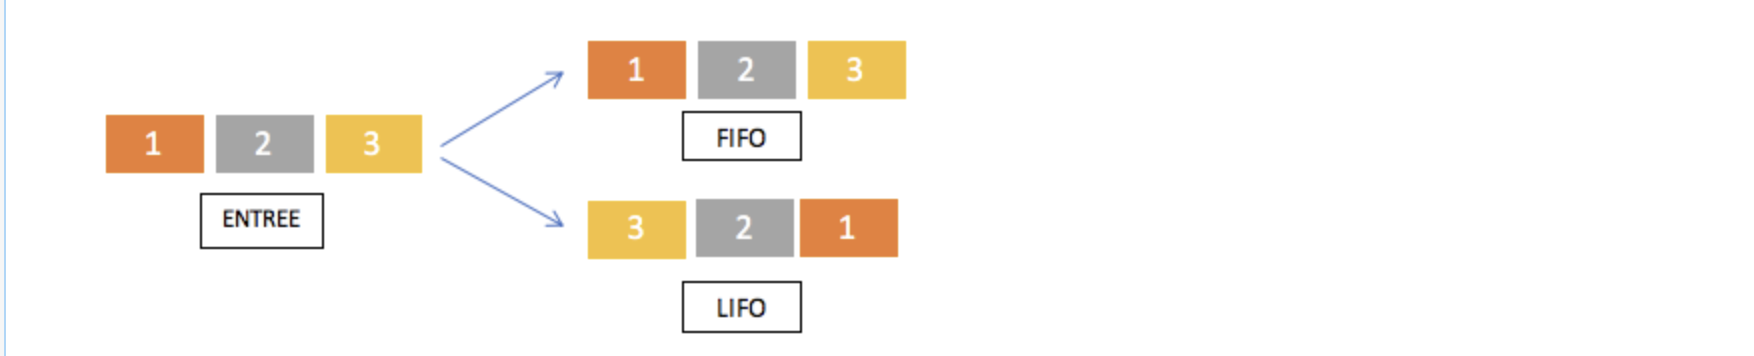

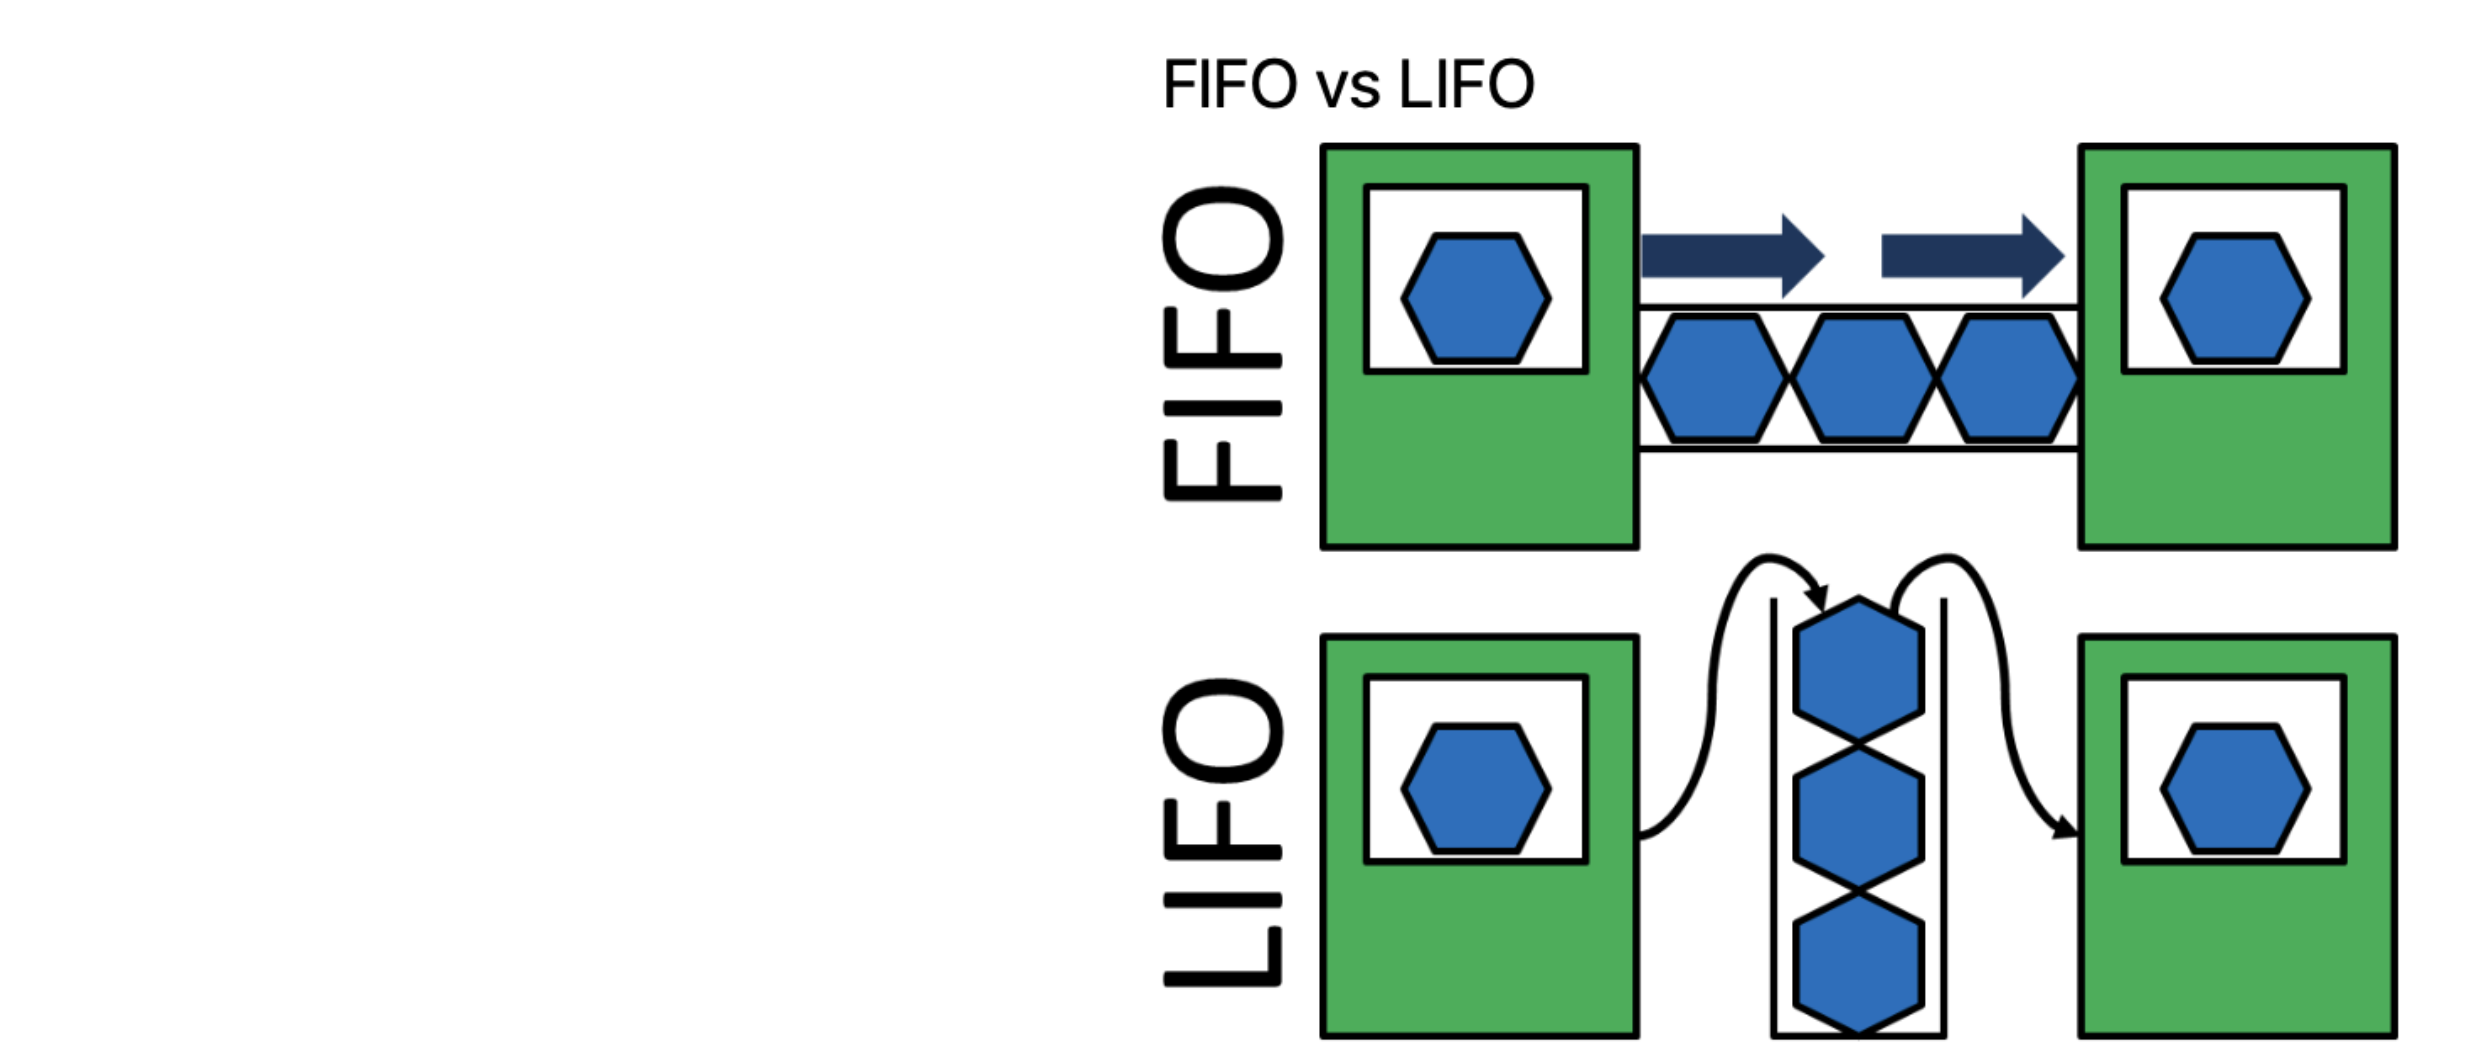



### Основные преимущества использования очередей

1. **Потокобезопасность**: Очередь автоматически обрабатывает синхронизацию между потоками, поэтому вам не нужно вручную использовать блокировки для защиты данных.
   
2. **Управление потоком данных**: Очереди позволяют организовать потоки данных между различными потоками, предотвращая ситуации, когда один поток потребляет данные быстрее, чем другой может их производить.

3. **Простота использования**: API очередей в Python простой и интуитивно понятный, что делает их использование удобным для передачи данных между потоками.

### Основные методы `queue.Queue`

- **`put(item)`**: Добавляет элемент `item` в очередь. Если очередь заполнена (когда установлено максимальное количество элементов), поток будет заблокирован до тех пор, пока не освободится место.

- **`get()`**: Извлекает и удаляет элемент из очереди. Если очередь пуста, поток будет заблокирован до тех пор, пока в очередь не будет добавлен новый элемент.

- **`task_done()`**: Указывает, что поток завершил обработку элемента. Этот метод используется в сочетании с `queue.join()`, чтобы указать, что все задачи завершены.

- **`join()`**: Блокирует выполнение до тех пор, пока все элементы, которые были добавлены в очередь, не будут обработаны (то есть вызов `task_done()` для каждого элемента).

### Пример 1: Основная очередь и добавление элементов

```python
import queue

q = queue.Queue()
q.put(1)
q.put(2)
q.put(3)

print(q.get())  # 1
print(q.get())  # 2
print(q.get())  # 3
# print(q.get())  # ?
```

### Пример - очередь переполнена 

```python
# Выполнение программы заблокируется, в очередь будут добавлены только 4 элементов 
import queue

my_queue = queue.Queue(maxsize=4)

for elem in range(8):
    try:
        my_queue.put(elem)
    except queue.Full:
        break

print(my_queue.qsize())
```

### Пример 2: Проверка пустоты очереди

```python
import queue

q = queue.Queue()
q.put(1)

while not q.empty():
    print(q.get())  # 1
```

### Пример 3: Ограничение размера очереди

```python
import queue

q = queue.Queue(maxsize=2)
q.put(1)
q.put(2)
# q.put(3)

print(q.full())  # True

q.get()
print(q.full())  # False

q.put(3)
print(q.get())  # 2
print(q.get())  # 3
```

### Пример 4: Использование нескольких потоков с очередью

```python
import threading
import queue
from time import sleep

def worker(q):
    while not q.empty():
        item = q.get()
        print(f'{threading.current_thread().ident} обработал {item}')
        q.task_done()
        sleep(0.05)

q = queue.Queue()

for i in range(20):
    q.put(i)

threads = []
for _ in range(2):
    t = threading.Thread(target=worker, args=(q,))
    t.start()
    threads.append(t)

for t in threads:
    t.join()

print("Все задачи выполнены")
```

### Пример 5: Использование `queue.LifoQueue` (стек) 

```python
import queue

q = queue.LifoQueue()
q.put(1)
q.put(2)
q.put(3)

print(q.get())  # 3 (последний добавленный)
print(q.get())  # 2
print(q.get())  # 1
```

### Пример 6: Использование `queue.PriorityQueue`

```python
import queue

q = queue.PriorityQueue()
q.put((2, "вторая задача"))
q.put((1, "первая задача"))
q.put((3, "третья задача"))

while not q.empty():
    print(q.get())  # (1, "первая задача"), затем (2, "вторая задача"), затем (3, "третья задача")
```

### Пример 7: Очередь с timeout

```python
import queue

q = queue.Queue()
q.put((2, "вторая задача"))
q.put((1, "первая задача"))
q.put((3, "третья задача"))

while True:
    print(q.get(timeout=5))
```

### Пример 8: Очередь с timeout и потоками 
```python
import threading
import queue
from time import sleep

def worker(q):
    while True:
        try:
            item = q.get(timeout=2)
            print(f"Потребитель обработал {item} (поток {threading.current_thread().ident})")
            q.task_done()
            sleep(0.05)

        except queue.Empty:
            print(f"Очередь пуста, завершение работы (поток {threading.current_thread().ident})")
            break

q = queue.Queue()

for i in range(5):
    q.put(i)

threads = []
for _ in range(3):
    t = threading.Thread(target=worker, args=(q,))
    t.start()
    threads.append(t)

q.join()

```


### Пример c producer & consumer


```python
import threading
import queue
import time

def producer(q, count):
    for i in range(count):
        print(f"Производитель добавляет задачу {i}")
        q.put(i)
        time.sleep(1)  # Имитация задержки

def consumer(q):
    while True:
        task = q.get()
        print(f"Потребитель обрабатывает задачу {task}")
        time.sleep(2)  # Имитация обработки задачи
        q.task_done()

# Создаем очередь
q = queue.Queue()

# Запускаем поток-производитель
producer_thread = threading.Thread(target=producer, args=(q, 10))
producer_thread.start()

# Запускаем несколько потоков-потребителей
for i in range(3):
    consumer_thread = threading.Thread(target=consumer, args=(q,))
    consumer_thread.daemon = True  # Потоки завершатся при завершении основного потока
    consumer_thread.start()

# Ожидаем завершения всех задач
producer_thread.join()
q.join()  # Ждем пока все задачи из очереди будут обработаны

print("Все задачи завершены.")
```

### Пояснение примера:

1. **Производитель (producer)**:
   - Поток-производитель добавляет задачи в очередь с помощью метода `put()`.
   - В данном примере производитель добавляет 10 задач с задержкой в 1 секунду между добавлениями.

2. **Потребитель (consumer)**:
   - Поток-потребитель извлекает задачи из очереди с помощью метода `get()` и обрабатывает их.
   - После обработки каждой задачи вызывается `task_done()`, чтобы указать, что задача завершена.

3. **Daemon-потоки**:
   - Потребители запускаются как daemon-потоки, что означает, что они автоматически завершат работу, как только завершится основной поток (или все не-демон-потоки).

4. **`join()`**:
   - Основной поток блокируется на вызове `q.join()`, ожидая, пока все задачи из очереди не будут завершены.



### Передача исключений в основной поток через очередь

In [72]:
import threading
import queue

def thread_function(number, q):
    try:
        result = 10 / number  # Это может вызвать деление на ноль
        print(f"Результат: {result}")
    except Exception as e:
        q.put((threading.current_thread().name, e))

exception_queue = queue.Queue()

threads = []
for i in range(5):
    thread = threading.Thread(target=thread_function, args=(i, exception_queue))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

while not exception_queue.empty():
    thread_name, exception = exception_queue.get()
    print(f"Исключение в {thread_name}: {exception}")

Результат: 10.0
Результат: 5.0
Результат: 3.3333333333333335
Результат: 2.5
Исключение в Thread-10317 (thread_function): division by zero


## Как можно передавать информацию из потоков? 

#### 1. **Использование глобальной переменной с блокировкой**

Если вы все же хотите использовать глобальную переменную, необходимо защитить доступ к ней с помощью блокировки (`Lock`), чтобы избежать состояния гонки.

Пример:

```python
import threading

# Глобальная переменная для хранения результатов
results = []
lock = threading.Lock()

def thread_function(number):
    result = number * 2  # Пример вычисления
    with lock:
        results.append(result)

threads = []
for i in range(5):
    thread = threading.Thread(target=thread_function, args=(i,))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

print("Результаты:", results)
```

В этом примере используется глобальная переменная `results` для хранения результатов работы потоков. Доступ к этой переменной защищен с помощью блокировки, что предотвращает состояние гонки.

#### 2. **Использование очереди (`Queue`)**

Альтернативой глобальным переменным является использование очереди (`queue.Queue`). Это более безопасный и удобный способ для передачи данных между потоками.

Пример:

```python
import threading
import queue

def thread_function(number, q):
    result = number * 2
    q.put(result)

# Очередь для хранения результатов
result_queue = queue.Queue()

threads = []
for i in range(5):
    thread = threading.Thread(target=thread_function, args=(i, result_queue))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

# Сбор результатов из очереди
results = []
while not result_queue.empty():
    results.append(result_queue.get())

print("Результаты:", results)
```

Очередь является потокобезопасной, и вам не нужно заботиться о ручной синхронизации доступа к ней.

#### 3. **Использование списка потоков и атрибутов**

Еще один способ — создание пользовательского класса для потоков, который сохраняет результат в атрибуте экземпляра:

```python
import threading

class MyThread(threading.Thread):
    def __init__(self, number):
        super().__init__()
        self.number = number
        self.result = None

    def run(self):
        self.result = self.number * 2

threads = []
for i in range(5):
    thread = MyThread(i)
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

# Сбор результатов из каждого потока
results = [thread.result for thread in threads]

print("Результаты:", results)
```

В этом примере каждый поток сохраняет результат в своем атрибуте `result`. После завершения всех потоков результаты можно собрать и использовать.

# `Многопроцессность (библиотека multiprocessing)`

## `Многопроцессорность`

**Многопроцессорность** — это использование нескольких центральных процессоров (CPU) в одном компьютере для выполнения вычислительных задач. В контексте программирования и архитектуры вычислительных систем многопроцессорность позволяет распределять вычислительную нагрузку между несколькими процессорами, что повышает производительность и устойчивость системы.

### Основные понятия

1. **Процессор (CPU)**: Центральный процессор — это основная вычислительная единица компьютера, которая выполняет инструкции программ.

2. **Многопроцессорная система**: Это компьютерная система с двумя или более процессорами, которые работают параллельно. Такие системы могут иметь одну материнскую плату с несколькими процессорами (симметричная многопроцессорность) или быть кластерами из нескольких компьютеров.

3. **Ядро процессора**: Современные процессоры часто имеют несколько ядер — это, по сути, отдельные процессоры внутри одного физического процессора. Например, 4-ядерный процессор способен выполнять четыре задачи одновременно.

4. **Параллелизм**: В контексте многопроцессорности параллелизм означает одновременное выполнение нескольких задач (процессов или потоков) на разных процессорах или ядрах.

### Виды многопроцессорности

1. **Симметричная многопроцессорность (SMP)**:
- Все процессоры имеют равный доступ к памяти и устройствам ввода-вывода.
- Операционная система распределяет задачи между процессорами.
- Основное преимущество — балансировка нагрузки и отказоустойчивость, так как если один процессор выйдет из строя, другие могут продолжать работу.


2. **Ассиметричная многопроцессорность (AMP)**:
- Один главный процессор управляет системой, остальные выполняют подчинённые задачи.
- Используется в более специализированных системах, например, в системах реального времени.


3. **Массово-параллельная обработка (MPP)**:
- В этой архитектуре множество процессоров (иногда тысячи) работают вместе на большой вычислительной задаче.
- Каждый процессор имеет свою собственную память и взаимодействует с другими через сеть.


4. **Кластерные системы**:
- В кластерах несколько компьютеров объединены в одну систему, которая распределяет вычислительные задачи между всеми узлами (независимыми компьютерами).
- Это особенно полезно для обработки больших данных или выполнения сложных научных расчетов.


### Преимущества многопроцессорности

1. **Повышение производительности**: Многопроцессорные системы могут выполнять больше задач одновременно, что увеличивает общую производительность системы. Это особенно важно для серверов, которые обслуживают множество пользователей или обрабатывают большие объемы данных.

2. **Отказоустойчивость**: В случае выхода из строя одного процессора, другие процессоры могут продолжать работу, обеспечивая устойчивость системы.

3. **Масштабируемость**: В многопроцессорных системах можно добавлять дополнительные процессоры для увеличения вычислительных мощностей без значительных изменений в архитектуре системы.

4. **Эффективная параллелизация**: В задачах, которые можно разделить на независимые части, многопроцессорные системы могут значительно сократить время их выполнения.

### Недостатки и вызовы многопроцессорности

1. **Сложность разработки**: Программирование для многопроцессорных систем требует учета параллелизма, синхронизации и эффективного распределения задач. Это делает разработку программного обеспечения более сложной задачей.

2. **Проблемы синхронизации**: Как и в случае с многопоточностью, многопроцессорные системы сталкиваются с проблемами доступа к общим ресурсам, что требует использования механизмов синхронизации, таких как мьютексы или семафоры.

3. **Проблемы с производительностью**: Добавление новых процессоров не всегда приводит к линейному увеличению производительности из-за накладных расходов на координацию между процессорами и возможного уменьшения производительности из-за конфликтов при доступе к общей памяти.

4. **Энергопотребление**: Многопроцессорные системы потребляют больше энергии, что важно учитывать при проектировании серверных и высокопроизводительных систем.

### Примеры использования многопроцессорных систем

- **Научные исследования**: Многопроцессорные системы широко используются для выполнения сложных вычислений в таких областях, как физика, химия, биология, климатология и другие науки.
  
- **Серверные системы**: Веб-серверы, базы данных и облачные сервисы активно используют многопроцессорные системы для обслуживания большого количества запросов одновременно.
  
- **Видеоигры и мультимедиа**: Современные игры и программы для обработки видео и графики требуют огромных вычислительных ресурсов, и многопроцессорность позволяет улучшить их производительность.

- **Большие данные и машинное обучение**: Обработка больших данных и обучение сложных моделей машинного обучения требуют значительных вычислительных мощностей, что делает многопроцессорные системы незаменимыми в этих областях.



### ВОТ ТУТ ВАЖНО `if __name__ == '__main__':` 

В Python конструкция `if __name__ == '__main__':` используется для обеспечения того, чтобы код внутри этого блока выполнялся только тогда, когда файл запускается как самостоятельная программа, а не импортируется как модуль в другой код. В контексте многопроцессности это особенно важно по нескольким причинам:

### 1. Предотвращение рекурсивного создания процессов

Когда вы запускаете программу, которая создает новые процессы, Python по умолчанию импортирует основной скрипт в каждый новый процесс. Если в этом скрипте есть код, который автоматически запускает процессы при импорте (то есть вне блока `if __name__ == '__main__':`), это приведет к рекурсивному созданию новых процессов, что может быстро привести к переполнению памяти и падению программы.

Пример:

```python
import multiprocessing

def worker():
    print("Рабочий процесс выполняется")

# Этот код вызовет бесконечную рекурсию при отсутствии if __name__ == '__main__': 
process = multiprocessing.Process(target=worker)
process.start()
process.join()
```

### 2. Логика работы блокировки GIL и создания процессов

В многопроцессной среде важно ограничить код, который создает и запускает процессы, только основным скриптом, чтобы избежать непредвиденных последствий, таких как рекурсивный запуск процессов.

### Пример правильного использования `if __name__ == '__main__':`

```python
import multiprocessing

def worker():
    print("Рабочий процесс выполняется")

if __name__ == '__main__':
    process = multiprocessing.Process(target=worker)
    process.start()
    process.join()
```

Здесь код, создающий и запускающий процесс, будет выполнен только при запуске файла как основного скрипта. Если этот файл будет импортирован в другой скрипт, процесс не будет создан автоматически.


## Как узнать количество доступных ядер процессора?

In [77]:
import os

num_cpus = os.cpu_count()
print(f"Доступное количество ядер: {num_cpus}")

Доступное количество ядер: 8


### В этом примере создаются и запускаются 5 процессов, каждый из которых выполняет функцию `worker`

In [38]:
import multiprocessing

def worker(num):
    """Функция, которую будет выполнять процесс."""
    print(f'Процесс {num} выполняется')

if __name__ == '__main__':
    processes = []
    for i in range(8):
        process = multiprocessing.Process(target=worker, args=(i,))
        processes.append(process)
        process.start()

    for process in processes:
        process.join() # <------ следим за 

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = r

## `Pool`

`Pool` в контексте модуля `multiprocessing` в Python — это механизм для управления пулом рабочих процессов. Он предоставляет удобный интерфейс для параллельного выполнения задач, распределяя их между несколькими процессами и управляя их жизненным циклом. Использование `Pool` позволяет эффективно использовать все доступные ядра процессора, снижая при этом сложность ручного управления процессами.

### Основные особенности `Pool`:

1. **Параллельное выполнение**: `Pool` позволяет выполнять функции параллельно, распределяя их между процессами, входящими в пул.
2. **Ограничение количества процессов**: Вы можете задать количество процессов в пуле. Если задач больше, чем доступных процессов, они будут выполнены по мере освобождения процессов.
3. **Упрощенное использование**: `Pool` абстрагирует детали управления процессами, предоставляя простые методы для параллельного выполнения задач, такие как `map`, `apply`, `apply_async`, `map_async` и другие.

### Основные методы `Pool`:

- **`apply(func, args=())`**: Выполняет функцию `func` с аргументами `args` в одном из процессов пула. Возвращает результат выполнения.
- **`apply_async(func, args=(), callback=None)`**: Асинхронная версия `apply`. Результат выполнения можно получить позже с помощью метода `get()`.
- **`map(func, iterable)`**: Применяет функцию `func` ко всем элементам итерируемого объекта и возвращает список результатов.
- **`map_async(func, iterable)`**: Асинхронная версия `map`.
- **`close()`**: Закрывает пул, больше не принимаются новые задачи.
- **`join()`**: Ожидает завершения всех процессов в пуле.


### Пример использования пула процессов `Pool`
Здесь создается пул из 4 процессов, и каждый процесс выполняет функцию `square` для своего элемента списка.



In [ ]:
from multiprocessing import Pool
import os
from time import sleep

def square(x):
    print(f'Процесс {os.getpid()} обрабатывает {x}')
    sleep(1)
    return x * x

if __name__ == '__main__':
    with Pool(processes=4) as p:
        results = p.map(square, list(range(20))) # <--- тут мог быть список из файлов / фото
    print(results)




**Описание работы:**

1. **Создание пула**: В примере выше, `Pool(4)` создает пул из 4 процессов. Это означает, что одновременно могут выполняться до 4 задач.
2. **Метод `map`**: Метод `map` применяет функцию `square` к каждому элементу списка `[1, 2, 3, 4, 5]`. Каждый элемент будет передан в один из процессов в пуле. Результаты выполнения всех задач возвращаются в виде списка.
3. **Закрытие пула**: Конструкция `with` автоматически закрывает пул и завершает все процессы по окончании работы, освобождая ресурсы.

### Пример с использованием очереди


In [ ]:
from multiprocessing import Process, Queue

def worker(q):
    q.put('Привет из процесса!')

if __name__ == '__main__':
    q = Queue()
    p = Process(target=worker, args=(q,))
    p.start()
    print(q.get())  # Получаем данные из очереди
    p.join()

Разница между использованием `Pool` и ручным управлением процессами (без `Pool`) в контексте многопроцессности заключается в следующем:

### 1. Управление процессами

- **Без `Pool`**:
  - Когда вы создаете процессы вручную с помощью `multiprocessing.Process`, вы полностью контролируете создание, запуск и завершение процессов. Это означает, что вы должны сами отслеживать состояния процессов, запускать их, дожидаться их завершения и закрывать ресурсы.
  - Пример без использования `Pool`:

    ```python
    import multiprocessing

    def square(x):
        print(f"Процесс {multiprocessing.current_process().pid} обрабатывает {x}")
        return x * x

    if __name__ == '__main__':
        processes = []
        results = []

        for i in [1, 2, 3, 4, 5]:
            process = multiprocessing.Process(target=square, args=(i,))
            processes.append(process)
            process.start()

        for process in processes:
            process.join()
    ```

    В этом коде вы должны самостоятельно создавать процессы и следить за их завершением.

- **С `Pool`**:
  - Использование `Pool` значительно упрощает управление процессами. `Pool` автоматически управляет пулом рабочих процессов, распределяет задачи между ними и контролирует их выполнение.
  - Пример с использованием `Pool`:

    ```python
    from multiprocessing import Pool
    import os

    def square(x):
        print(f"Процесс {os.getpid()} обрабатывает {x}")
        return x * x

    if __name__ == '__main__':
        with Pool(4) as p:
            results = p.map(square, [1, 2, 3, 4, 5])
        print(results)
    ```

    Здесь `Pool` берет на себя все сложности по управлению процессами, включая их создание, распределение задач и завершение.

### 2. Автоматизация и простота

- **Без `Pool`**:
  - Вы полностью контролируете процесс выполнения, что может быть полезно для более сложных сценариев, но требует больше кода и управления.
  - Этот подход дает большую гибкость, но требует более глубокого понимания многопроцессности и обработки ошибок.

- **С `Pool`**:
  - `Pool` автоматически управляет распределением задач между процессами и может быть использован для выполнения одинаковых или похожих задач в параллельном режиме.
  - Он особенно полезен для задач, которые легко распараллеливаются, таких как обработка больших массивов данных, файлов и т.д.
  - С `Pool` код становится более компактным и простым для понимания.

### 3. Масштабируемость

- **Без `Pool`**:
  - При большом количестве задач и процессов управление ими вручную может стать сложным и трудоемким. Каждый процесс будет создан, управляем и завершен вручную.

- **С `Pool`**:
  - `Pool` позволяет легко масштабировать выполнение задач, просто увеличив количество процессов в пуле. Это особенно полезно для задач, где требуется обработка большого количества элементов, например, при работе с большими наборами данных.

### 4. Производительность

- **Без `Pool`**:
  - Может потребоваться больше ресурсов и времени на управление большим количеством процессов, особенно если они создаются и завершаются динамически.

- **С `Pool`**:
  - `Pool` эффективно управляет ресурсами, поддерживая фиксированное количество процессов, которые повторно используются для выполнения задач, что снижает затраты на создание и завершение процессов.

### Заключение

Использование `Pool` упрощает работу с многопроцессностью, автоматизируя управление процессами и их выполнение. Это удобный инструмент для выполнения множества однотипных задач в параллельном режиме. В случаях, когда требуется больший контроль и гибкость, может быть полезно управлять процессами вручную, но это требует большего объема кода и более глубокого понимания работы многопроцессных программ.